In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-molecule/roboBohr.csv


In [2]:
df = pd.read_csv("/kaggle/input/energy-molecule/roboBohr.csv")

In [3]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


**Understanding Data**

In [4]:
df.shape

(16242, 1278)

**Understanding Columns in the dataset**

* **Unnamed: 0** - Index for each molecule.
* **0-1274** - 1275 entries in the Coulomb matrix that act as molecular features.
* **pubchem_id** - Pubchem Id where the molecular structures are obtained. A unique identifier for each molecule
*  **Eat** - atomization energy calculated by simulations using the Quantum Espresso package.

**Changing name of columns**

In [5]:
df = df.rename(columns = {"Unnamed: 0":"Molecule_ Index"})

In [6]:
df.head()

,Molecule_ Index,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


In [7]:
df.describe()

,Molecule_ Index,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,8139.041805,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,...,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201,33107.484300,-11.178969
std,4698.182820,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,...,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472,23456.785147,3.659133
min,0.000000,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-23.245373
25%,4068.250000,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12298.250000,-13.475805
50%,8142.500000,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27731.500000,-10.835211
75%,12207.750000,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55020.750000,-8.623903
max,16272.000000,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,...,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000,74980.000000,-0.789513


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Molecule_ Index to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


All the columns are numerical

**Checking for missing values**

In [9]:
df.isna().sum()

Molecule_ Index    0
0                  0
1                  0
2                  0
3                  0
                  ..
1272               0
1273               0
1274               0
pubchem_id         0
Eat                0
Length: 1278, dtype: int64

There are no missing values.

Unique columns that can be dropped

In [10]:
df = df.drop(['Molecule_ Index', 'pubchem_id'], axis = 1)

Target Variable : **Eat**

In [11]:
df.Eat.describe()

count    16242.000000
mean       -11.178969
std          3.659133
min        -23.245373
25%        -13.475805
50%        -10.835211
75%         -8.623903
max         -0.789513
Name: Eat, dtype: float64

**Note** : Energy of atomisation is negative when the energy is released in breaking of bonds


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


**Depicting Data Variations**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


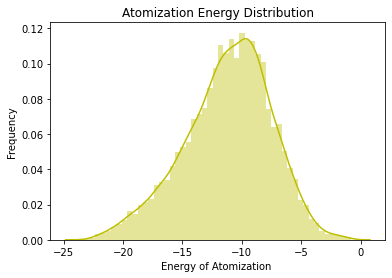

In [13]:
sns.distplot(df['Eat'], kde=True, color="y")
plt.xlabel('Energy of Atomization ')
plt.ylabel('Frequency')
plt.title('Atomization Energy Distribution');
plt.show()

**Modeling**

Here I decided to check different methods linear models, nearest neighbors and boosted trees. The paper stated that the best method is booosted trees used with xgboost. Let's check this out here..

In [14]:
Y = df['Eat']
df = df.drop(["Eat"], axis = 1)

**Splitting data into train test**

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=0.3)

In [16]:
x_train.shape

(11369, 1275)

In [17]:
x_test.shape

(4873, 1275)

In [18]:
from lightgbm.sklearn import LGBMRegressor

In [19]:
lgmb = LGBMRegressor()

In [20]:
# lgbm_model = lgmb(num_leaves = 25, n_estimators = 250, min_child_weight = 5, max_depth = 4, learning_rate = 0.08,colsample_bytree = 0.3)


**Different Models Fit**

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error


In [22]:
xgb_model = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 0.0625, reg_lambda = 0,
                         max_depth = 6, colsample_bytree = 0.2, min_child_weight = 10, n_estimators = 400)

rf_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 3, max_features = 'auto', max_depth = 8)

knn_model = KNeighborsRegressor(weights = 'distance', n_neighbors = 3, leaf_size = 90)

ridge_model = Ridge(alpha = 1000)

lasso_model = Lasso(alpha = 0.01, max_iter=10000)

enet_model = ElasticNet(alpha = 0.01, l1_ratio = 0.1, max_iter=10000)



**Root mean Square error vs Models**

[15:08:01] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:49] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:36] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:10:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:12] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


<AxesSubplot:xlabel='Model'>

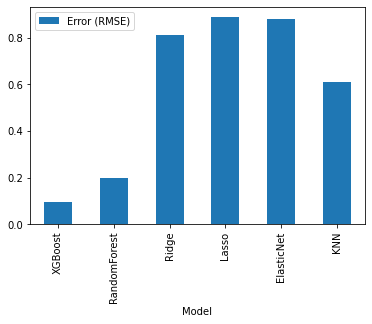

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def rmse_fun(predicted, actual):
    return np.sqrt(np.mean(np.square(predicted - actual)))

rms = make_scorer(rmse_fun, greater_is_better=False)

mymodels = [
     ('XGBoost', xgb_model),
     ('RandomForest', rf_model),
     ('Ridge', ridge_model),
     ('Lasso', lasso_model),
     ('ElasticNet', enet_model),
     ('KNN', knn_model)
]

scores = [
    -1.0 * cross_val_score(model, x_train.values, y_train.values, scoring=rms, cv=5).mean()
    for _,model in mymodels
]

dfs = pd.DataFrame({ 'Model': [name for name, _ in mymodels], 'Error (RMSE)': scores })
dfs.plot(x='Model', kind='bar')

In [24]:
dfs

,Model,Error (RMSE)
0,XGBoost,0.096551
1,RandomForest,0.199670
2,Ridge,0.811771
3,Lasso,0.888539
4,ElasticNet,0.879554
5,KNN,0.611916


**Score for XGB**

In [25]:
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print("The score for xgb model is "+str(np.sqrt(mean_squared_error(y_test, y_pred_xgb))))

[15:29:46] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
The score for xgb model is 0.08472249202494647


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


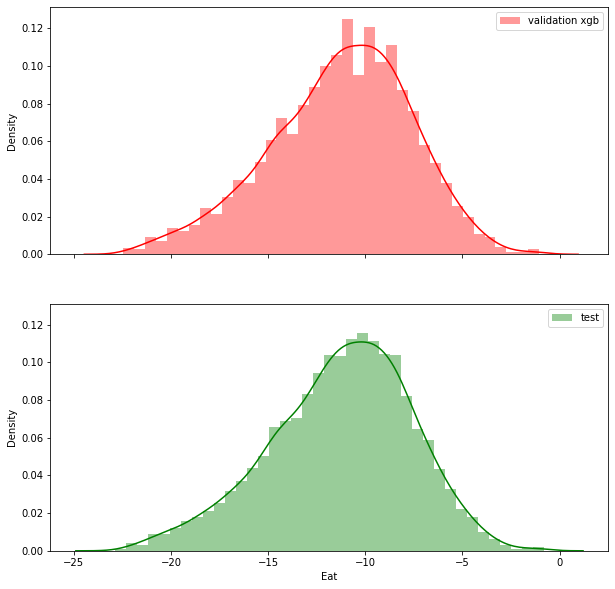

In [26]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10,10))
sns.distplot(y_pred_xgb, ax=ax[0], color='Red', label='validation xgb')
sns.distplot(y_test, ax=ax[1], color='green', label='test')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()

**Suggestions are welcome**